In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
Anime= pd.read_csv('/content/anime.csv')
Rating= pd.read_csv('/content/rating.csv')

In [ ]:
Anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
Anime.shape

(12294, 7)

In [ ]:
Anime.isna().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [ ]:
Anime['gnere'] = Anime['genre'].fillna('Unknown')

Anime['rating'] = Anime['rating'].fillna(Anime['rating'].mean())

In [ ]:
Anime.dropna(inplace= True)

<Axes: ylabel='type'>

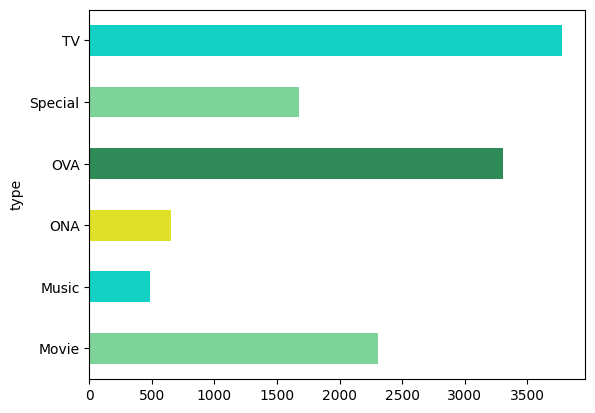

In [ ]:
custom_colors = ['#7cd499', '#12d1c4', '#e0e028', '#2E8B57']
Anime.groupby('type').size().plot(kind='barh', color=custom_colors[:len(Anime['type'].unique())], edgecolor='none')

<ipython-input-12-3117edd0b434>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(Anime, y='rating', x='type', palette='Dark2')


<Axes: xlabel='type', ylabel='rating'>

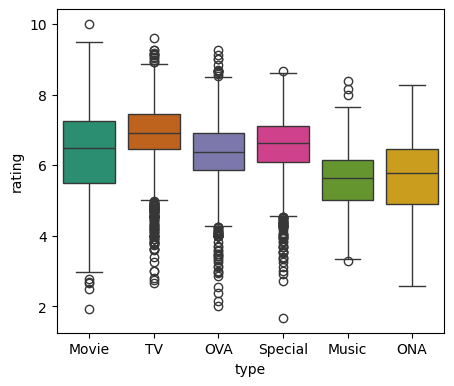

In [ ]:
figsize = (5, 0.7 * len(Anime['type'].unique()))
plt.figure(figsize=figsize)

sns.boxplot(Anime, y='rating', x='type', palette='Dark2')

In [ ]:
Rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
Rating.shape

(7813737, 3)

In [ ]:
Rating.isna().sum()

,0
user_id,0
anime_id,0
rating,0


In [ ]:
Anime_rating = pd.merge(Anime,Rating,on='anime_id')

In [ ]:
Anime_rating.head()

,anime_id,name,genre,type,episodes,rating_x,members,gnere,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"Drama, Romance, School, Supernatural",99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"Drama, Romance, School, Supernatural",152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"Drama, Romance, School, Supernatural",244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"Drama, Romance, School, Supernatural",271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"Drama, Romance, School, Supernatural",278,-1


In [ ]:
Anime_rating.shape

(7813613, 10)

In [ ]:
Anime_rating.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating_x,0
members,0
gnere,0
user_id,0
rating_y,0


In [ ]:
Anime_rating['anime_id'].unique()

array([32281,  5114, 28977, ...,  5621,  6133, 26081])

In [ ]:
Anime_rating.drop_duplicates(subset='anime_id', keep='first', inplace=True)

In [ ]:
Anime_rating.head()

,anime_id,name,genre,type,episodes,rating_x,members,gnere,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"Drama, Romance, School, Supernatural",99,5
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"Action, Adventure, Drama, Fantasy, Magic, Mili...",3,10
26773,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"Action, Comedy, Historical, Parody, Samurai, S...",39,-1
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"Sci-Fi, Thriller",5,9
47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"Action, Comedy, Historical, Parody, Samurai, S...",5,9


In [ ]:
Anime_rating = Anime_rating.drop('genre', axis=1)

In [ ]:
Anime_rating.shape

(11164, 9)

In [ ]:
pivot_x = Anime_rating.pivot_table(index='anime_id', columns='user_id', values='rating_x', fill_value=0)
pivot_y = Anime_rating.pivot_table(index='anime_id', columns='user_id', values='rating_y', fill_value=0)

In [ ]:
scaler = StandardScaler()
norm_x = scaler.fit_transform(pivot_x)
norm_y = scaler.fit_transform(pivot_y)

In [ ]:
similarity_x = cosine_similarity(norm_x)
similarity_y = cosine_similarity(norm_y)

In [ ]:
combined_similarity = (similarity_x + similarity_y) / 2

In [ ]:
combined_similarity.shape

(11164, 11164)

In [ ]:
def recommend_anime(anime_name):
  # Convert input anime name to lowercase and strip whitespace
  anime_name = anime_name.lower().strip()

  # Find the index of the anime in the DataFrame
  if anime_name in Anime_rating['name'].str.lower().str.strip().values:
    index = np.where(Anime_rating['name'].str.lower().str.strip() == anime_name)[0][0]
    # Get similarity scores for the anime
    similarity_scores = combined_similarity[index]
    # Sort the similarity scores in descending order
    sorted_indexes = np.argsort(similarity_scores)[::-1]
    # Print the top 6 similar anime
    print("Recommended anime similar to", anime_name, ":")
    for i in range(1, 7):  # Start from 1 to exclude the anime itself
      recommended_anime_index = sorted_indexes[i]
      recommended_anime_name = Anime_rating.iloc[recommended_anime_index]['name']
      print(i,".", recommended_anime_name)
      # Access details from Anime_rating DataFrame using recommended_anime_index
      details = Anime_rating.iloc[recommended_anime_index]
      score = similarity_scores[recommended_anime_index]
      gnere = details['gnere']
      anime_type = details['type']
      episodes = details['episodes']
      # Assuming similar_anime_title and score are defined elsewhere
      # Replace with actual variables if different
      print(f"({anime_type}, {episodes} episodes)")
      print(f"Gnere: {gnere}")
      print(f"Similarity Score: {score:.2f}")
      print()
  else:
    print(f"Anime '{anime_name}' not found in the dataset.")

In [ ]:
recommend_anime("Yasuji no Pornorama: Yacchimae!!")

Recommended anime similar to yasuji no pornorama: yacchimae!! :
1 . Jankenman: Kaijuu Dai Kessen
(OVA, 1 episodes)
Gnere: Comedy, Kids
Similarity Score: 1.00

2 . Omusubi Kororin
(Movie, 1 episodes)
Gnere: Fantasy, Kids
Similarity Score: 1.00

3 . No Littering
(ONA, 1 episodes)
Gnere: Comedy, Horror
Similarity Score: 1.00

4 . Detective File 1: Kindan no Ai
(OVA, 1 episodes)
Gnere: Hentai
Similarity Score: 1.00

5 . San-biki no Koguma-san
(Movie, 1 episodes)
Gnere: Kids
Similarity Score: 1.00

6 . Saru Kani Gassen
(OVA, 1 episodes)
Gnere: Kids
Similarity Score: 1.00



In [ ]:
Anime_rating.tail()

,anime_id,name,type,episodes,rating_x,members,gnere,user_id,rating_y
7813596,9316,Toushindai My Lover: Minami tai Mecha-Minami,OVA,1,4.15,211,Hentai,20171,7
7813600,5543,Under World,OVA,1,4.28,183,Hentai,39532,-1
7813604,5621,Violence Gekiga David no Hoshi,OVA,4,4.88,219,Hentai,27364,-1
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,OVA,1,4.98,175,Hentai,27364,-1
7813611,26081,Yasuji no Pornorama: Yacchimae!!,Movie,1,5.46,142,Hentai,27364,-1
